In [1]:
import warnings
from trainer import *
from models import *
from datamodule import Dataset
warnings.filterwarnings("ignore")
from plotting_utils import *
from car_env import *
from training_utils import *
torch.manual_seed(2000)
%reload_ext autoreload
%autoreload 2

In [2]:
car_env = CarEnv()
dataset = Dataset(load = False)
dataset.summarize(train = True)
class_train_weights = dataset.class_weights(dataset.y_train) # inverse to how frequent the class is
print(f"Class Weights: {class_train_weights}\n")  
dataset.summarize(train = False)
class_test_weights = dataset.class_weights(dataset.y_test) # inverse to how frequent the class is
print(f"Class Weights: {class_test_weights}") 

Environment: CarRacing-v2
Action space: Discrete(5)
Observation space: Box(0, 255, (96, 96, 3), uint8)
DATA SAVED!
N Examples: 6369
N Inputs: 3
N Classes: 5
Classes: [0. 1. 2. 3. 4.]
 - Class 0.0: 1000 (15.701051970482022)
 - Class 1.0: 1500 (23.551577955723033)
 - Class 2.0: 1500 (23.551577955723033)
 - Class 3.0: 2000 (31.402103940964043)
 - Class 4.0: 369 (5.7936881771078665)
Class Weights: tensor([0.1804, 0.1203, 0.1203, 0.0902, 0.4889])

N Examples: 2749
N Inputs: 3
N Classes: 5
Classes: [0. 1. 2. 3. 4.]
 - Class 0.0: 133 (4.838122953801383)
 - Class 1.0: 275 (10.00363768643143)
 - Class 2.0: 406 (14.76900691160422)
 - Class 3.0: 1896 (68.97053473990542)
 - Class 4.0: 39 (1.4186977082575483)
Class Weights: tensor([0.1890, 0.0914, 0.0619, 0.0133, 0.6445])


In [3]:
bin_dataset = dataset.split_by_labels(zero = [0,3], one = [1,2,4])
bin_dataset.summarize() 
bin_class_train_weights = bin_dataset.class_weights(bin_dataset.y_train) # inverse to how frequent the class is
print(f"Class Train Weights: {bin_class_train_weights}")
bin_class_test_weights = bin_dataset.class_weights(bin_dataset.y_test) # inverse to how frequent the class is
print(f"Class Test Weights: {bin_class_test_weights}")       

N Examples: 6369
N Inputs: 3
N Classes: 2
Classes: [0 1]
 - Class 0: 3000 (47.103155911446066)
 - Class 1: 3369 (52.89684408855393)
Class Train Weights: tensor([0.5290, 0.4710])
Class Test Weights: tensor([0.2619, 0.7381])


In [30]:
cnn = CNN(name="new", num_classes=2)
trainer = Trainer(model=cnn, data=bin_dataset)

EPOCH 1 SCORE: 0.588 LOSS: 0.671
EPOCH 2 SCORE: 0.601 LOSS: 0.645
EPOCH 3 SCORE: 0.668 LOSS: 0.599
EPOCH 4 SCORE: 0.648 LOSS: 0.640
EPOCH 5 SCORE: 0.644 LOSS: 0.632
EPOCH 6 SCORE: 0.646 LOSS: 0.621
EPOCH 7 SCORE: 0.652 LOSS: 0.631
EPOCH 8 SCORE: 0.653 LOSS: 0.626
Early stopping at epoch 8 due to no improvement.
Train Score:  0.7054482698440552
Test Score:  0.713714063167572
              precision    recall  f1-score   support

           0      0.847     0.747     0.794      2029
           1      0.465     0.621     0.532       720

    accuracy                          0.714      2749
   macro avg      0.656     0.684     0.663      2749
weighted avg      0.747     0.714     0.725      2749



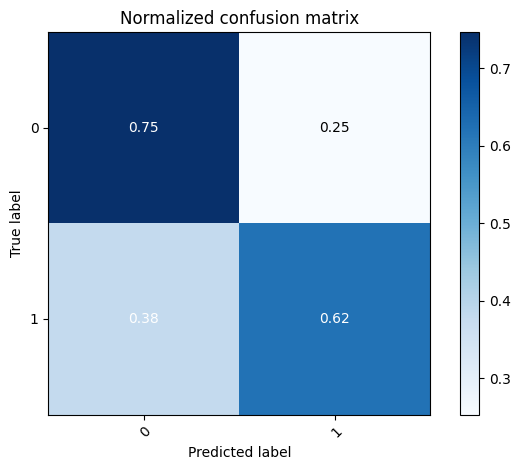

In [31]:
trainer.fit(max_epochs=10, lr=0.001)
cnn.evaluate(bin_dataset)

Train Score:  0.6567749977111816
Test Score:  0.4434339702129364
              precision    recall  f1-score   support

         0.0      0.166     0.481     0.247       133
         1.0      0.326     0.560     0.412       275
         2.0      0.455     0.672     0.543       406
         3.0      0.855     0.379     0.525      1896
         4.0      0.022     0.256     0.041        39

    accuracy                          0.443      2749
   macro avg      0.365     0.470     0.353      2749
weighted avg      0.698     0.443     0.496      2749



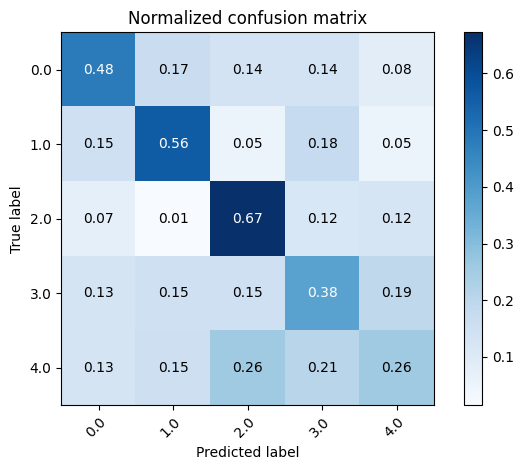

-94.99999999999889
False


: 

In [28]:
cnn.load(name="new")
cnn.evaluate(dataset)
car_env.play(cnn)